# Daily level SKU data Analysis 

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.21f' % x)

In [4]:
# daily level data:
dailydata = pd.read_csv('daysummary_top50_v2.csv')
print(f'dimenstions of the data {dailydata.shape}')
dailydata.head(5)

dimenstions of the data (9126, 4)


,sale_date,whidx,skuidx,qty
0,01-01-2019,65265,3269615,3
1,01-01-2019,69100,3269615,1
2,01-01-2019,70360,3269615,1
3,02-01-2019,65245,3269615,1
4,02-01-2019,65261,3269615,1


# Exploration of data : function based approach

In [5]:
def missing_(data,colname):
    missing = data[colname].isna().sum()
    return missing

def unique_(data,colname):
    uniq_ = data[colname].nunique()
    return uniq_

def datetypeconv(data,colname):
    data[colname] = pd.to_datetime(data[colname])
    return data

In [6]:
for col in list(dailydata.columns):
    print(f'missing information in {col} is {missing_(dailydata,col)}')

missing information in sale_date is 0
missing information in whidx is 0
missing information in skuidx is 0
missing information in qty is 0


In [7]:
for col in list(dailydata.columns):
    print(f'unique information in {col} is {unique_(dailydata,col)}')

unique information in sale_date is 668
unique information in whidx is 36
unique information in skuidx is 4
unique information in qty is 16


In [8]:
dailydata.dtypes

sale_date    object
whidx         int64
skuidx        int64
qty           int64
dtype: object

In [9]:
dailydata = datetypeconv(dailydata,'sale_date')
dailydata['sale_date'].dtypes
dailydata['sale_date']

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-02-01
4      2019-02-01
          ...    
9121   2020-12-30
9122   2020-12-30
9123   2020-12-30
9124   2020-12-30
9125   2020-12-30
Name: sale_date, Length: 9126, dtype: datetime64[ns]

In [10]:
dailydata.qty.mean()

1.502739425816349

# demand analysis across warehouse & sku levels:

In [11]:
dailydata.groupby(['skuidx']).agg(total_demand = pd.NamedAgg('qty','sum'),
                              records = pd.NamedAgg('sale_date','count')).reset_index().sort_values('records',ascending = False)

,skuidx,total_demand,records
3,3589974,5462,3591
1,3338776,5488,3567
0,3269615,1897,1303
2,3481968,867,665


In [12]:
dailydata.groupby(['whidx','skuidx']).agg(total_demand = pd.NamedAgg('qty','sum'),
                                          records = pd.NamedAgg('sale_date','count')).reset_index().sort_values('records',ascending = False)

,whidx,skuidx,total_demand,records
3,28902,3338776,605,329
15,34082,3338776,439,272
4,28902,3589974,461,260
28,44612,3589974,415,253
36,52780,3589974,392,243
9,31642,3338776,435,242
27,44612,3338776,385,238
30,46299,3338776,362,224
22,38243,3589974,377,216
38,60181,3589974,329,214


In [26]:
dailydata['MOS'] = dailydata.sale_date.dt.to_period('M')
MOS_summary = dailydata.groupby(['whidx','skuidx','MOS']).agg(total_demand = pd.NamedAgg('qty','sum'),
                                                avg_demand = pd.NamedAgg('qty','mean'),
                                                max_demand = pd.NamedAgg('qty','max'),
                                                min_demand = pd.NamedAgg('qty','min')).reset_index()
MOS_summary

,whidx,skuidx,MOS,total_demand,avg_demand,max_demand,min_demand
0,5156,3481968,2019-01,2,1.000000000000000000000,1,1
1,5156,3481968,2019-02,1,1.000000000000000000000,1,1
2,5156,3481968,2019-03,23,1.533333333333333436954,4,0
3,5156,3481968,2019-04,25,2.083333333333333481363,5,1
4,5156,3481968,2019-05,9,1.500000000000000000000,2,1
...,...,...,...,...,...,...,...
1176,83539,3269615,2020-08,16,1.454545454545454585826,3,1
1177,83539,3269615,2020-09,1,1.000000000000000000000,1,1
1178,83539,3269615,2020-10,3,3.000000000000000000000,3,3
1179,83539,3269615,2020-11,1,1.000000000000000000000,1,1


In [25]:
# Asma's Request:
A_ = dailydata.groupby(['skuidx']).agg(total_demand = pd.NamedAgg('qty','sum'),
                                       records = pd.NamedAgg('sale_date','count')).reset_index().sort_values('records',ascending = False)
A_ = A_.rename(columns = {'total_demand':'sku_lev_totalD'})
A_

,skuidx,sku_lev_totalD,records
3,3589974,5462,3591
1,3338776,5488,3567
0,3269615,1897,1303
2,3481968,867,665


In [27]:
MOS_summary = pd.merge(MOS_summary,A_,how = 'left',on = 'skuidx')
MOS_summary['%total_demand'] = (MOS_summary['total_demand']/MOS_summary['sku_lev_totalD'])*100
MOS_summary['%total_demand']

0      0.230680507497116493720
1      0.115340253748558246860
2      2.652825836216839761050
3      2.883506343713956088237
4      1.038062283737024138475
                 ...          
1176   0.843437005798629457765
1177   0.052714812862414341110
1178   0.158144438587243002514
1179   0.052714812862414341110
1180   1.054296257248286794450
Name: %total_demand, Length: 1181, dtype: float64

In [28]:
MOS_summary

,whidx,skuidx,MOS,total_demand,avg_demand,max_demand,min_demand,sku_lev_totalD,records,%total_demand
0,5156,3481968,2019-01,2,1.000000000000000000000,1,1,867,665,0.230680507497116493720
1,5156,3481968,2019-02,1,1.000000000000000000000,1,1,867,665,0.115340253748558246860
2,5156,3481968,2019-03,23,1.533333333333333436954,4,0,867,665,2.652825836216839761050
3,5156,3481968,2019-04,25,2.083333333333333481363,5,1,867,665,2.883506343713956088237
4,5156,3481968,2019-05,9,1.500000000000000000000,2,1,867,665,1.038062283737024138475
...,...,...,...,...,...,...,...,...,...,...
1176,83539,3269615,2020-08,16,1.454545454545454585826,3,1,1897,1303,0.843437005798629457765
1177,83539,3269615,2020-09,1,1.000000000000000000000,1,1,1897,1303,0.052714812862414341110
1178,83539,3269615,2020-10,3,3.000000000000000000000,3,3,1897,1303,0.158144438587243002514
1179,83539,3269615,2020-11,1,1.000000000000000000000,1,1,1897,1303,0.052714812862414341110


In [12]:
MOS_summary.loc[(MOS_summary['whidx'] == 5156) & (MOS_summary['skuidx'] == 3481968)]

,whidx,skuidx,MOS,total_demand,avg_demand,max_demand,min_demand
0,5156,3481968,2019-01,2,1.000000000000000000000,1,1
1,5156,3481968,2019-02,1,1.000000000000000000000,1,1
2,5156,3481968,2019-03,23,1.533333333333333436954,4,0
3,5156,3481968,2019-04,25,2.083333333333333481363,5,1
4,5156,3481968,2019-05,9,1.500000000000000000000,2,1
5,5156,3481968,2019-06,21,2.625000000000000000000,13,1
6,5156,3481968,2019-07,17,1.416666666666666740682,3,1
7,5156,3481968,2019-08,36,2.250000000000000000000,7,1
8,5156,3481968,2019-09,14,2.000000000000000000000,3,1
9,5156,3481968,2019-10,7,1.166666666666666740682,2,1


In [13]:
MOS_summary.loc[(MOS_summary['whidx'] == 28902) & (MOS_summary['skuidx'] == 3589974)]

,whidx,skuidx,MOS,total_demand,avg_demand,max_demand,min_demand
92,28902,3589974,2019-01,4,1.333333333333333259318,2,1
93,28902,3589974,2019-02,3,3.000000000000000000000,3,3
94,28902,3589974,2019-03,9,4.500000000000000000000,5,4
95,28902,3589974,2019-04,5,1.666666666666666740682,3,1
96,28902,3589974,2019-05,10,3.333333333333333481363,7,1
97,28902,3589974,2019-06,9,3.000000000000000000000,4,2
98,28902,3589974,2019-07,4,1.333333333333333259318,2,1
99,28902,3589974,2019-08,36,2.399999999999999911182,7,1
100,28902,3589974,2019-09,36,1.800000000000000044409,4,1
101,28902,3589974,2019-10,57,3.000000000000000000000,6,1


# SARIMAX FOR WHIDX : 28902 & SKUIDX : 3589974

In [14]:
data_3589974 = dailydata.loc[(dailydata['whidx'] == 28902) & (dailydata['skuidx'] == 3589974)]
data_3589974 = data_3589974.sort_values('sale_date',ascending = False) 

In [15]:
data_3589974.loc[(data_3589974['qty'] == 0) | (data_3589974['qty'] < 0)]

,sale_date,whidx,skuidx,qty,MOS
4117,2020-05-01,28902,3589974,0,2020-05


In [16]:
data_3589974 = data_3589974.loc[~(data_3589974['qty'] == 0)]

In [17]:
## test for stationarity : 
import statsmodels
from statsmodels.tsa.stattools import adfuller
adfuller(data_3589974['qty'])
adfuller(data_3589974['qty'])[1] < 0.05

""" the time series is stationary  
"""

' the time series is stationary  \n'

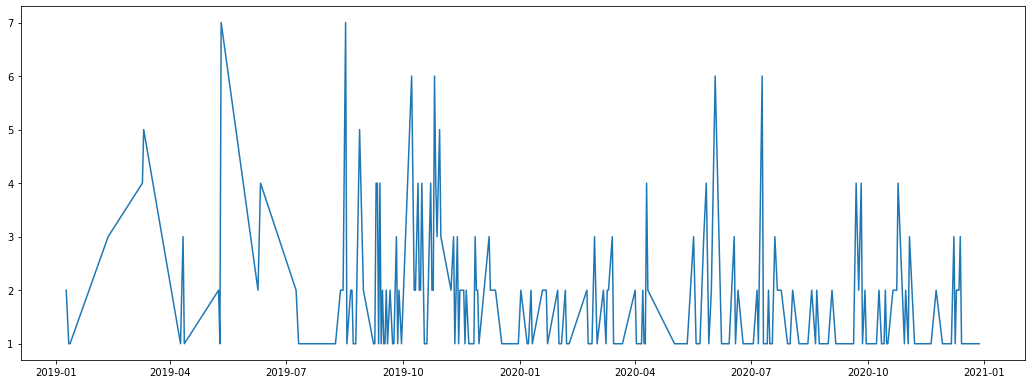

In [18]:
plt.rcParams["figure.figsize"] = (18,6.5)
plt.plot('sale_date','qty',data = data_3589974)

In [ ]:

"""
additive :
Xt = Tt + St + Ct + It

multiplicative :
Xt = Tt * St * Ct * It

"""

In [19]:
data_3589974.index = pd.to_datetime(data_3589974.index)

<AxesSubplot:xlabel='sale_date'>

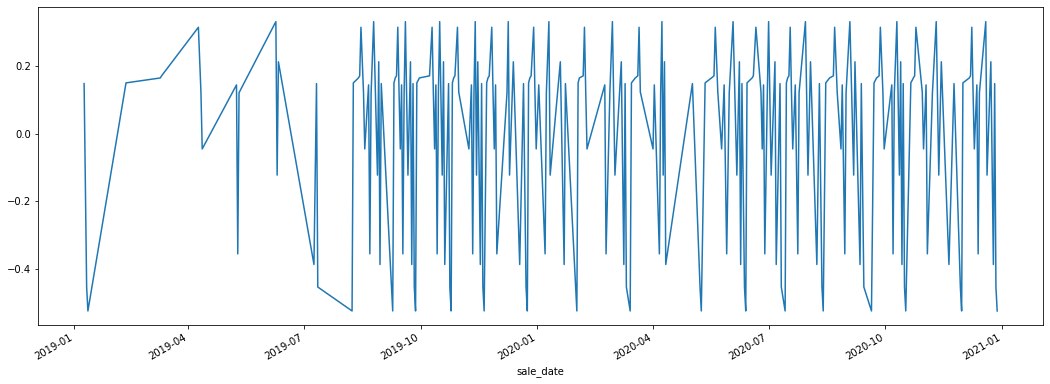

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
data_3589974.set_index(data_3589974.sale_date,inplace=True)  
result = seasonal_decompose(data_3589974['qty'],model = 'additive',period = 16)
result.seasonal.plot()

<AxesSubplot:xlabel='sale_date'>

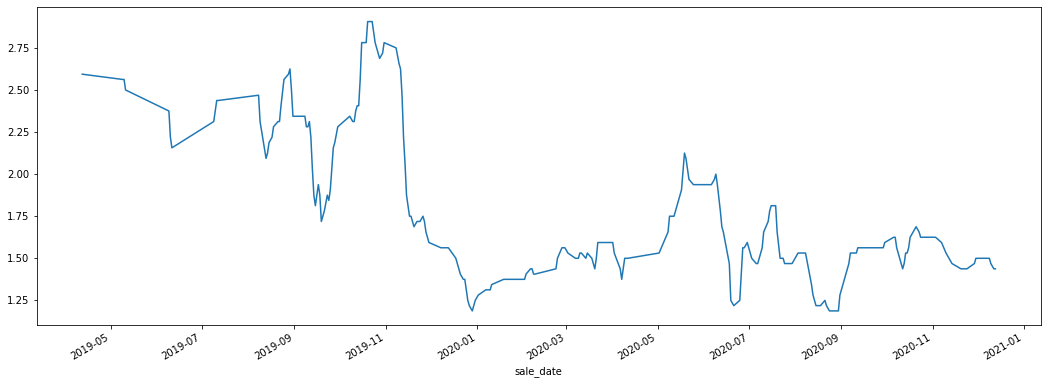

In [21]:
result.trend.plot()

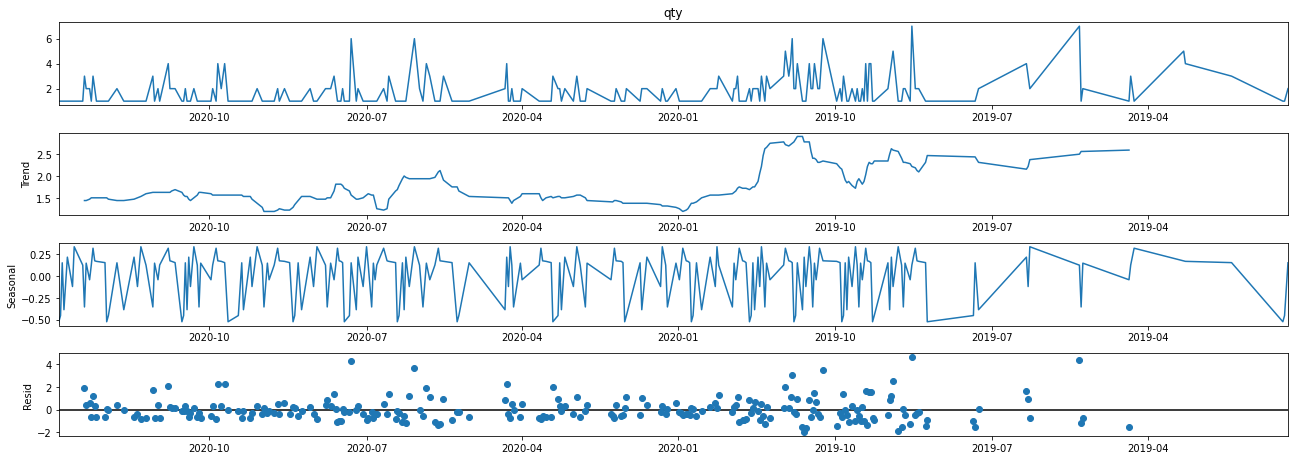

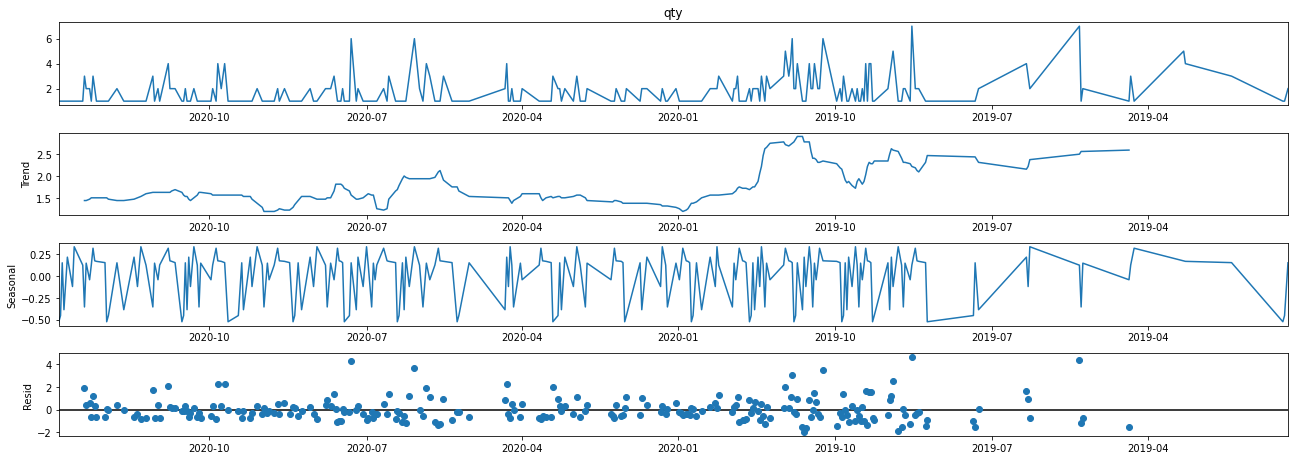

In [66]:
result.plot()

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


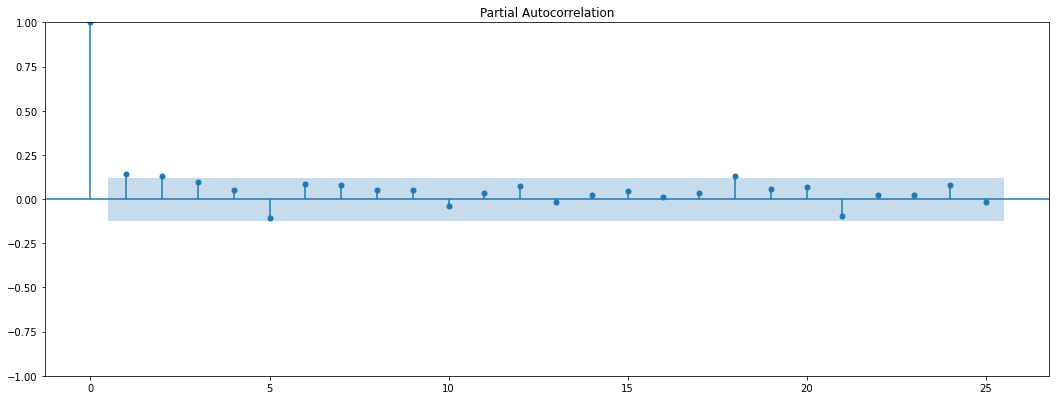

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(data_3589974.qty)

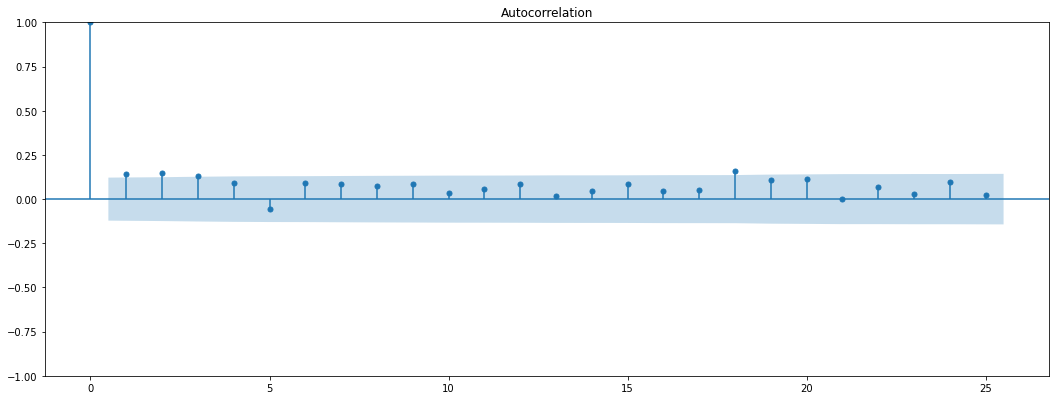

In [23]:
plot_acf(data_3589974.qty)

# test & train split based on sale date:

In [24]:
print(f'duration : start :{data_3589974.sale_date.min()} & end : {data_3589974.sale_date.max()}')
train = data_3589974.loc[data_3589974['sale_date'] <= '2020-11-30 00:00:00']
test = data_3589974.loc[data_3589974['sale_date'] > '2020-11-30 00:00:00']
test.shape[0]

duration : start :2019-01-09 00:00:00 & end : 2020-12-28 00:00:00


16

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
input_array = np.array(train.qty)
p = 1; q = 1
model = SARIMAX(input_array, order=(p,0,q))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -383.383
Date:                Wed, 17 Aug 2022   AIC                            772.767
Time:                        22:10:37   BIC                            783.246
Sample:                             0   HQIC                           776.988
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.001    745.765      0.000       0.997       1.002
ma.L1         -0.9512      0.020    -47.548      0.000      -0.990      -0.912
sigma2         1.3546      0.082     16.550      0.0

In [84]:
forecasts = model_fit.forecast(steps = 16)
fresult = pd.DataFrame({'actuals':list(test.iloc[0:16]['qty']),'forecast':list(forecasts)}) 
fresult['floor_forecast'] = np.floor(fresult['forecast'])
fresult['int_forecast'] = np.where((fresult['forecast'] - fresult['floor_forecast']) < 0.50,
                                   fresult['floor_forecast'],fresult['floor_forecast']+1)
fresult

,actuals,forecast,floor_forecast,int_forecast
0,1,2.315576956150420251390,2.000000000000000000000,2.000000000000000000000
1,1,2.314589497789568905972,2.000000000000000000000,2.000000000000000000000
2,1,2.313602460522048875902,2.000000000000000000000,2.000000000000000000000
3,1,2.312615844168288248284,2.000000000000000000000,2.000000000000000000000
4,1,2.311629648548792381746,2.000000000000000000000,2.000000000000000000000
5,1,2.310643873484142130081,2.000000000000000000000,2.000000000000000000000
6,1,2.309658518794995618606,2.000000000000000000000,2.000000000000000000000
7,1,2.308673584302087355979,2.000000000000000000000,2.000000000000000000000
8,3,2.307689069826228234206,2.000000000000000000000,2.000000000000000000000
9,2,2.306704975188305528633,2.000000000000000000000,2.000000000000000000000


<AxesSubplot:>

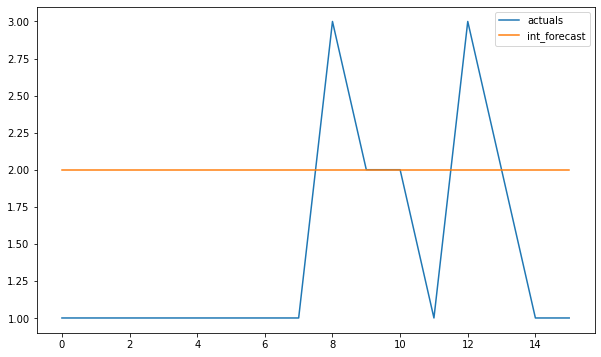

In [85]:
fresult[['actuals','int_forecast']].plot(figsize = (10,6))

# Refining the baseline Model :

In [17]:
# Normalisation:
def mean_normalize(data,col_name):
    data['meanN_qty'] = data[col_name] - data[col_name].mean()
    return data

In [18]:
data_3589974 = mean_normalize(data_3589974,'qty')
data_3589974

,sale_date,whidx,skuidx,qty,MOS,meanN_qty
9085,2020-12-28,28902,3589974,1,2020-12,-0.779922779922779918493
9069,2020-12-27,28902,3589974,1,2020-12,-0.779922779922779918493
9052,2020-12-26,28902,3589974,1,2020-12,-0.779922779922779918493
9038,2020-12-25,28902,3589974,1,2020-12,-0.779922779922779918493
9017,2020-12-23,28902,3589974,1,2020-12,-0.779922779922779918493
...,...,...,...,...,...,...
2299,2019-03-10,28902,3589974,4,2019-03,2.220077220077220303551
2922,2019-02-11,28902,3589974,3,2019-02,1.220077220077220081507
3461,2019-01-12,28902,3589974,1,2019-01,-0.779922779922779918493
2904,2019-01-11,28902,3589974,1,2019-01,-0.779922779922779918493


In [19]:
## test for stationarity : post-mean shift 
import statsmodels
from statsmodels.tsa.stattools import adfuller
adfuller(data_3589974['meanN_qty'])
adfuller(data_3589974['meanN_qty'])[1] < 0.05

True

In [20]:
train = data_3589974.loc[data_3589974['sale_date'] <= '2020-11-30 00:00:00']
test = data_3589974.loc[data_3589974['sale_date'] > '2020-11-30 00:00:00']
test.shape[0]

16

In [38]:
!pip install pmdarima

     -------------------------------------- 601.9/601.9 kB 6.3 MB/s eta 0:00:00
     -------------------------------------- 139.9/139.9 kB 8.1 MB/s eta 0:00:00
     ------------------------------------- 986.3/986.3 kB 15.7 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from pmdarima.arima import auto_arima
auto_model = auto_arima(train['meanN_qty'],start_p=0,d = 0,start_q=0,max_p=18,max_q = 18,method = 'basinhopping')
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -381.047
Date:                Thu, 18 Aug 2022   AIC                            768.093
Time:                        10:26:16   BIC                            778.572
Sample:                             0   HQIC                           772.314
                                - 243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9732      0.029     33.734      0.000       0.917       1.030
ma.L1         -0.9186      0.046    -20.052      0.000      -1.008      -0.829
sigma2         1.3459      0.074     18.268      0.000       1.201       1.490
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):               278.52
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               2.81   Skew:                             1.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
actual_optimizers = ['nm','bfgs','lbfgs','powell','cg','ncg','basinhopping']

In [81]:
optimizers = ['nm','bfgs','lbfgs','basinhopping']
def arima_optimizer(train_data,
                    p_start,
                    q_start,
                    d,
                    boundary_p,
                    boundary_q,
                    optimization_method):
    
    auto_model = auto_arima(train_data,
                            start_p=p_start,
                            d = d,
                            start_q=q_start,
                            max_p=boundary_p,
                            max_q = boundary_q,
                            method = optimization_method)
    
    order_ = auto_model.order
    datum = pd.DataFrame({'method':optimization_method,
                          'arima_order':[order_]})
    return datum

In [82]:
optimizer_results = pd.DataFrame(columns = ['method','arima_order'])
for optimizer in optimizers:
    
    dat = arima_optimizer(train['meanN_qty'],0,0,0,18,18,optimizer)
    optimizer_results = pd.concat([optimizer_results,dat])
    print(f'compiling for optimizer :{optimizer}')

compiling for optimizer :nm
compiling for optimizer :bfgs
compiling for optimizer :lbfgs
compiling for optimizer :basinhopping


In [83]:
optimizer_results

,method,arima_order
0,nm,"(1, 0, 1)"
0,bfgs,"(3, 0, 0)"
0,lbfgs,"(1, 0, 1)"
0,basinhopping,"(1, 0, 1)"


# Generating forecasts : based on Auto_Arima Framework

In [60]:
""" SARIMAX : Optimizer : basinhopping & order : (1,0,1)
"""
from statsmodels.tsa.statespace.sarimax import SARIMAX
input_array = np.array(train.meanN_qty)
p = 1; q = 1
model = SARIMAX(input_array, order=(p,0,q),method = 'basinhopping')
model_fit = model.fit(disp=0)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -381.047
Date:                Thu, 18 Aug 2022   AIC                            768.093
Time:                        11:02:41   BIC                            778.572
Sample:                             0   HQIC                           772.314
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9732      0.029     33.736      0.000       0.917       1.030
ma.L1         -0.9186      0.046    -20.053      0.000      -1.008      -0.829
sigma2         1.3459      0.074     18.269      0.0

In [61]:
forecasts = model_fit.forecast(steps = 16)
fresult = pd.DataFrame({'actuals':list(test.iloc[0:16]['meanN_qty']),'forecast':list(forecasts)}) 
fresult

,actuals,forecast
0,-0.779922779922779918493,0.384096784294565840590
1,-0.779922779922779918493,0.373804419059314663176
2,-0.779922779922779918493,0.363787850931634570983
3,-0.779922779922779918493,0.354039689574824012475
4,-0.779922779922779918493,0.344552742685717783289
5,-0.779922779922779918493,0.335320010688125003107
6,-0.779922779922779918493,0.326334681568462958712
7,-0.779922779922779918493,0.317590125849776805378
8,1.220077220077220081507,0.309079891700436815150
9,0.220077220077220081507,0.300797700173904447585


<AxesSubplot:>

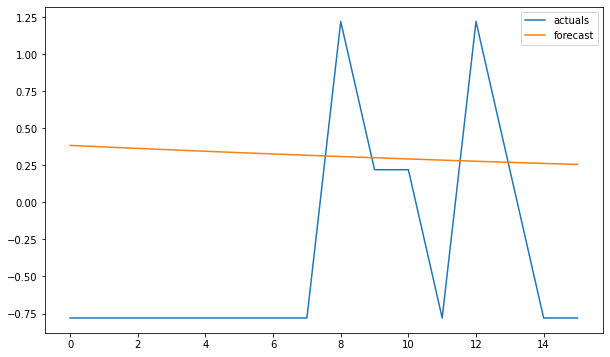

In [62]:
fresult[['actuals','forecast']].plot(figsize = (10,6))

In [ ]:
# Using Grid Search :

In [39]:
p_list = list(range(1,7))
q_list = list(range(1,7))

search_orders = ((1,0,1),)
for x in p_list:
    for y in q_list:
        search_orders = search_orders + ((x,0,y),)

In [46]:
!pip install skforecast==0.4.1

     ---------------------------------------- 79.8/79.8 kB 2.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
import pandas as pd
import skforecast
import matplotlib.pyplot as plt
from skforecast.model_selection_statsmodels import grid_search_sarimax

import warnings
warnings.filterwarnings('ignore')

param_grid = {'order': list(search_orders),
             'seasonal_order': [(0, 0, 0, 0)],
             'trend': [None, 'n', 'c']}

results_grid = grid_search_sarimax(
                y = data_3589974['meanN_qty'],
                param_grid = param_grid,
                initial_train_size = len(train),
                steps = 16,
                metric = 'mean_absolute_error',
                refit = False,
                verbose = False,
                fit_kwargs = {'maxiter': 200, 'disp': 0}
               )

results_grid

root       INFO  Number of models compared: 111
100%|███████████████████████████████████████████████████| 111/111 [06:48<00:00,  3.68s/it]


,params,metric,order,seasonal_order,trend
49,"{'order': (3, 0, 4), 'seasonal_order': (0, 0, ...",[1.288651565961735],"(3, 0, 4)","(0, 0, 0, 0)",n
48,"{'order': (3, 0, 4), 'seasonal_order': (0, 0, ...",[1.288651565961735],"(3, 0, 4)","(0, 0, 0, 0)",None
18,"{'order': (1, 0, 6), 'seasonal_order': (0, 0, ...",[1.2893158758813497],"(1, 0, 6)","(0, 0, 0, 0)",None
19,"{'order': (1, 0, 6), 'seasonal_order': (0, 0, ...",[1.2893158758813497],"(1, 0, 6)","(0, 0, 0, 0)",n
37,"{'order': (2, 0, 6), 'seasonal_order': (0, 0, ...",[1.2910970035334315],"(2, 0, 6)","(0, 0, 0, 0)",n
...,...,...,...,...,...
89,"{'order': (5, 0, 5), 'seasonal_order': (0, 0, ...",[1.4087116694266197],"(5, 0, 5)","(0, 0, 0, 0)",c
97,"{'order': (6, 0, 2), 'seasonal_order': (0, 0, ...",[1.4139779402486554],"(6, 0, 2)","(0, 0, 0, 0)",n
96,"{'order': (6, 0, 2), 'seasonal_order': (0, 0, ...",[1.4139779402486554],"(6, 0, 2)","(0, 0, 0, 0)",None
101,"{'order': (6, 0, 3), 'seasonal_order': (0, 0, ...",[1.4247862377579286],"(6, 0, 3)","(0, 0, 0, 0)",c
